----
#### Pandas plot
  - 5 Easy Ways of Customizing Pandas Plots and Charts
  - https://towardsdatascience.com/5-easy-ways-of-customizing-pandas-plots-and-charts-7aefa73ff18b
----

In [1]:
# The first line is only required if you are using a Jupyter Notebook
 
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df_weather = pd.read_csv(
    "https://raw.githubusercontent.com/alanjones2/dataviz/master/london2018.csv")

In [3]:
df_weather.tail()

,Year,Month,Tmax,Tmin,Rain,Sun
7,2018,8,24.5,14.5,48.2,182.1
8,2018,9,20.9,11.0,29.4,195.0
9,2018,10,16.5,8.5,61.0,137.0
10,2018,11,12.2,5.8,73.8,72.9
11,2018,12,10.7,5.2,60.6,40.3


In [4]:
df_weather.shape, df_weather.dtypes

((12, 6),
 Year       int64
 Month      int64
 Tmax     float64
 Tmin     float64
 Rain     float64
 Sun      float64
 dtype: object)

In [5]:
df = df_weather.copy()
df.to_csv("london_weather_2018.csv", index=False)
df.tail()

,Year,Month,Tmax,Tmin,Rain,Sun
7,2018,8,24.5,14.5,48.2,182.1
8,2018,9,20.9,11.0,29.4,195.0
9,2018,10,16.5,8.5,61.0,137.0
10,2018,11,12.2,5.8,73.8,72.9
11,2018,12,10.7,5.2,60.6,40.3


In [6]:
os.getcwd()

'C:\\Users\\user\\Documents\\mini-course\\eda_examples'

<AxesSubplot:xlabel='Month'>

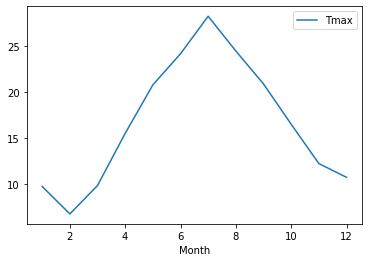

In [7]:
df.plot(x="Month", y="Tmax")

----
#### 1. Change the size and color
----

<AxesSubplot:xlabel='Month'>

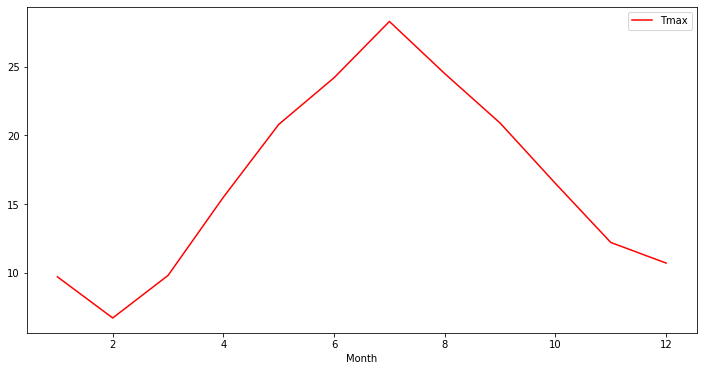

In [8]:
df.plot(x="Month", y="Tmax", figsize=(12,6), color="Red")

----
#### 2. Setting a title
----

<AxesSubplot:title={'center':'Maximum Temperatures'}, xlabel='Month'>

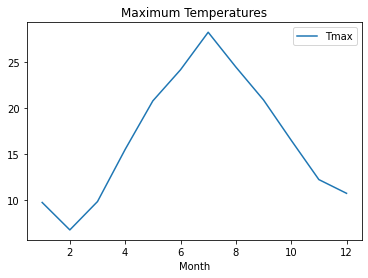

In [9]:
df.plot(x="Month", y="Tmax", title="Maximum Temperatures")

----
#### 3. Display a grid
----

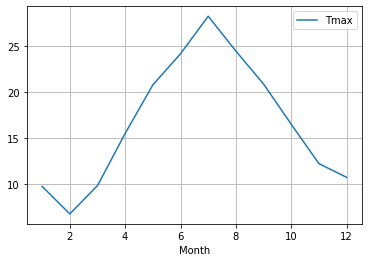

In [10]:
df.plot(x="Month", y="Tmax", grid=True)
plt.show()

----
#### 4. Changing the legend
----

<AxesSubplot:xlabel='Month'>

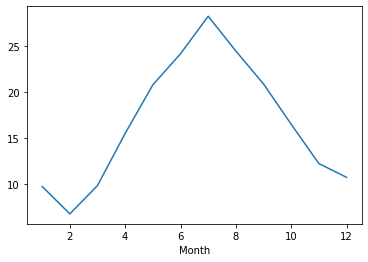

In [11]:
df.plot(x="Month", y="Tmax", legend=False)

<AxesSubplot:xlabel='Month'>

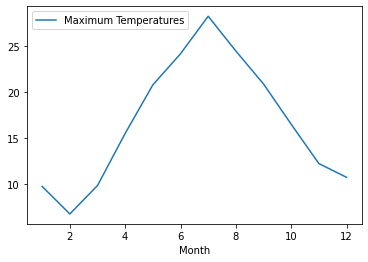

In [12]:
df.plot(x="Month", y="Tmax", label="Maximum Temperatures")

----
#### 5. Customizing the ticks
----

<AxesSubplot:xlabel='Month'>

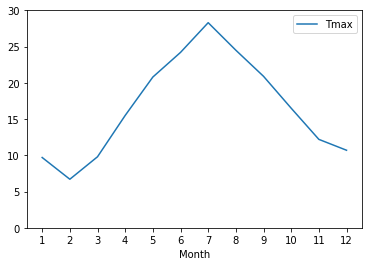

In [13]:
df.plot(x="Month", y="Tmax", xticks=range(1,13), yticks=(0,5,10,15,20,25,30))

<AxesSubplot:xlabel='Month'>

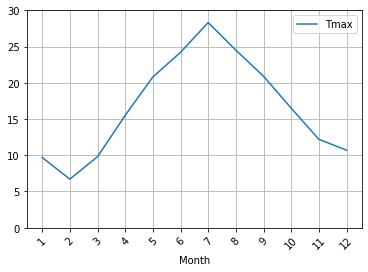

In [14]:
df.plot(x="Month", y="Tmax", grid=True, rot=45,
        xticks=range(1,13), yticks=(0,5,10,15,20,25,30))

<AxesSubplot:xlabel='Month'>

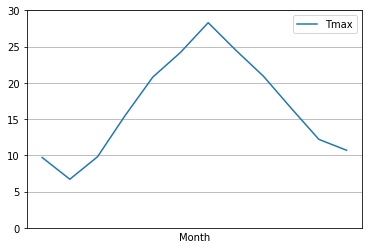

In [15]:
# If you wanted to remove the ticks altogether
df.plot(x="Month", y="Tmax", grid=True,
        xticks=(), yticks=(0,5,10,15,20,25,30))

<AxesSubplot:xlabel='Month'>

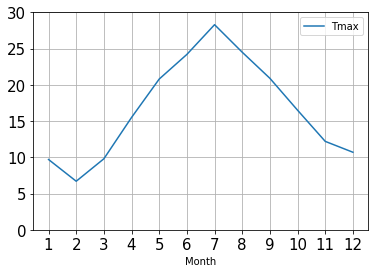

In [16]:
# you can change the font size.
df.plot(x="Month", y="Tmax", grid=True, fontsize=15,
        xticks=range(1,13), yticks=(0,5,10,15,20,25,30))

----
#### It could get messy
----

<AxesSubplot:title={'center':'London Temp 2018'}, xlabel='Month'>

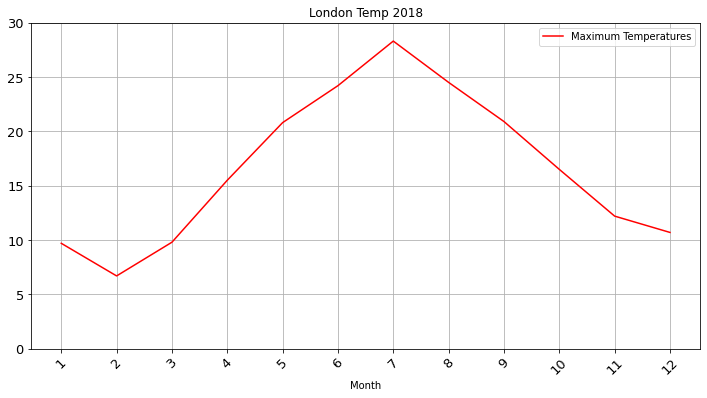

In [17]:
kwargs = {
          "xticks"  : range(1,13),
          "yticks"  : (0,5,10,15,20,25,30),
          "grid"    : True,
          "rot"     : 45,
          "fontsize": 13,
          "color"   : "Red",
          "label"   : "Maximum Temperatures",
          "title"   : "London Temp 2018",
          "figsize" : (12, 6)
         }

df.plot(x="Month", y="Tmax", **kwargs)

In [18]:
range(1,13)

range(1, 13)

In [1]:
import warnings
import pandas as pd
import FinanceDataReader as fdr

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

warnings.filterwarnings("ignore")
mpl.rcParams["axes.unicode_minus"] = False

path      = "C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf"
# C:\Windows\WinSxS\amd64_microsoft-windows-font-truetype-arial_31bf3856ad364e35_10.0.18362.1_none_44e0e02b2a9382cc\
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)
plt.rc('font', family=font_name)
plt.rc('font', size=15)
#--------------------------------------------------------------------------------------#
df = fdr.DataReader("USD/KRW", start="2021-01-01")
columns = "Close	Open	High	Low".split()
#--------------------------------------------------------------------------------------#
def get_index_number(value):
    for i,  index in enumerate(df.index):
        if index == value:
            return i
#--------------------------------------------------------------------------------------#
x_min = df.query("Close == {}".format(df["Close"].min())).index[0]
x_max = df.query("Close == {}".format(df["Close"].max())).index[0]
x_now = df["Close"].index[-1]

x1 = get_index_number(x_min)
x2 = get_index_number(x_max)
x3 = get_index_number(x_now)

y1 = df["Close"].min()
y2 = df["Close"].max()
y3 = df["Close"][-1]
#--------------------------------------------------------------------------------------#
kwargs = {
    "title"  : "< 원달러 가격 변동율 >",
    "figsize": (12, 8),
    "xticks" : range(len(df)),
    "yticks" : range(1080,1130,5),
    "xlabel" : "2021년도 1월부터...",
    "ylabel" : "원달러 가격",
    "grid"   : True,
    "rot"    : 85
}
#--------------------------------------------------------------------------------------#
df1 = df.reset_index()
df1["Date"] = df1["Date"].astype(str)
#--------------------------------------------------------------------------------------#
x4 = df1.query("Date == '2021-01-26'").index[0] # buy_date
y4 = df1["Close"][x4]
#--------------------------------------------------------------------------------------#
ax = df1.plot(x="Date", y="Close", **kwargs)
#--------------------------------------------------------------------------------------#
ax.axvline(x1, ls='--', color='b')
ax.axvline(x2, ls='--', color='r')
ax.axvline(x3, ls='--', color='g')
ax.axvline(x4, ls='-', color='y')

ax.text(x1, y1, y1, rotation=0)
ax.text(x2, y2, y2, rotation=0)
ax.text(x3, y3, y3, rotation=45)
ax.text(x4, y4, y4, rotation=0)
#--------------------------------------------------------------------------------------#


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf'

In [ ]:
df.to_csv("temp.csv")

In [ ]:
df_ex = df.reset_index()

In [ ]:
df_ex.dtypes

In [ ]:
# Date      datetime64[ns]
df_ex["Year"]  = df_ex["Date"].dt.year
df_ex["Month"] = df_ex["Date"].dt.month
df_ex["Day"]   = df_ex["Date"].dt.day
df_ex.tail()

In [ ]:
df_ex.drop(["Year", "Month", "Day"], axis=1, inplace=True) # inplace=True

In [ ]:
year  = df_ex["Date"].dt.year
month = df_ex["Date"].dt.month_name()
day   = df_ex["Date"].dt.day

In [ ]:
df_ex.insert(1, "Year", year)
df_ex.insert(2, "Month", month)
df_ex.insert(3, "Day", day)

In [ ]:
df_ex.head()

In [ ]:
month